<a href="https://colab.research.google.com/github/salouaLs/PFA-2023/blob/main/2023_pfa_(Finale).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prepare Data: using nltk**

Since the Model we are using is pretrained and understands the sentence as a whole, we don't want to over clean it. So, I only removed the html tags and the special chars



*   Removal of HTML contents like "< br>".
*   Removal of punctutions, special characters like '\'.



In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "instakk" - maybe you meant "install"
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
# Read in data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/PFA-Dataset.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(50000, 4)
(500, 4)


In [ ]:
df.head(5)

,ID,review,sentiment,score
0,1,One of the other reviewers has mentioned that ...,positive,4
1,2,A wonderful little production. <br /><br />The...,positive,4
2,3,I thought this was a wonderful way to spend ti...,positive,4
3,4,Basically there's a family where a little boy ...,negative,2
4,5,"Petter Mattei's ""Love in the Time of Money"" is...",positive,3


### **Remove html content**

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd

def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Apply the remove_html_tags function to the 'Text' column
for row in df:
        # Access the values of each column in the row
        for column in row:
            df['review'] = df['review'].apply(remove_html_tags)


In [ ]:
df.head(5)

,ID,review,sentiment,score
0,1,One of the other reviewers has mentioned that ...,positive,4
1,2,A wonderful little production. The filming tec...,positive,4
2,3,I thought this was a wonderful way to spend ti...,positive,4
3,4,Basically there's a family where a little boy ...,negative,2
4,5,"Petter Mattei's ""Love in the Time of Money"" is...",positive,3


### **Remove punctutions, special char**

In [ ]:
import re

def remove_characters(df):
    # Iterate over each row
    for index, row in df.iterrows():
        # Access the 'review' column and remove characters
        review = row['review']
        review = re.sub('\[[^]]*\]', ' ', review)
        review = re.sub('[^a-zA-Z]', ' ' , review)
        
        # Update the 'review' column in the DataFrame
        df.at[index, 'review'] = review
    
    # Return the modified DataFrame
    return df

remove_characters(df)

,ID,review,sentiment,score
0,1,One of the other reviewers has mentioned that ...,positive,4
1,2,A wonderful little production The filming tec...,positive,4
2,3,I thought this was a wonderful way to spend ti...,positive,4
3,4,Basically there s a family where a little boy ...,negative,2
4,5,Petter Mattei s Love in the Time of Money is...,positive,3
...,...,...,...,...
495,496,American Nightmare is officially tied in my...,negative,1
496,497,First off I have to say that I loved the book...,negative,2
497,498,This movie was extremely boring I only laughe...,negative,2
498,499,I was disgusted by this movie No it wasn t be...,negative,1


### **Lower case all the characters**

In [ ]:
for i in df:
    df['review'] = df['review'].str.lower()

In [ ]:
df.head()

,ID,review,sentiment,score
0,1,one of the other reviewers has mentioned that ...,positive,4
1,2,a wonderful little production the filming tec...,positive,4
2,3,i thought this was a wonderful way to spend ti...,positive,4
3,4,basically there s a family where a little boy ...,negative,2
4,5,petter mattei s love in the time of money is...,positive,3


# **roBERTa Model**

*    Use a model trained of a large corpus of data.
*   Transformer model accounts for the words but also the context related to other words.

In [ ]:
!pip install transformers
!pip install scipy.special

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scipy.special (from versions: none)
ERROR: No matching distribution found for scipy.special


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
def count_words(paragraph):
    words = paragraph.split()
    return len(words)

df['word_count'] = df['review'].apply(count_words)

df = df[df['word_count'] <= 350]
df.head(93)

,ID,review,sentiment,score,word_count
0,1,one of the other reviewers has mentioned that ...,positive,4,313
1,2,a wonderful little production the filming tec...,positive,4,160
2,3,i thought this was a wonderful way to spend ti...,positive,4,167
3,4,basically there s a family where a little boy ...,negative,2,133
4,5,petter mattei s love in the time of money is...,positive,3,228
...,...,...,...,...,...
106,107,the performance of every actor and actress in...,positive,5,113
107,108,while star trek the motion picture was mostly ...,negative,2,313
108,109,despite later claims this early talkie melodr...,positive,3,177
109,110,this is the best version so far that you wil...,positive,4,123


In [ ]:
example = df['review'][1]

In [ ]:
example

'a wonderful little production  the filming technique is very unassuming  very old time bbc fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  the actors are extremely well chosen  michael sheen not only  has got all the polari  but he has all the voices down pat too  you can truly see the seamless editing guided by the references to williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  a masterful production about one of the great master s of comedy and his life  the realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  it plays on our knowledge and our senses  particularly with the scenes concerning orton and halliwell and the sets  particularly of their flat with halliwell s murals decorating every surface  are terribly well done '

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0045776037, 'roberta_neu': 0.033355013, 'roberta_pos': 0.96206737}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
model.config.max_position_embeddings

514

In [ ]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    text = row['review']
    myid = row['ID']
    roberta_result = polarity_scores_roberta(text)
    res[myid] = {**roberta_result}
  except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/407 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'ID'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df

,ID,roberta_neg,roberta_neu,roberta_pos,review,sentiment,score,word_count
0,1,0.288429,0.503607,0.207964,one of the other reviewers has mentioned that ...,positive,4,313
1,2,0.004578,0.033355,0.962067,a wonderful little production the filming tec...,positive,4,160
2,3,0.054364,0.166225,0.779411,i thought this was a wonderful way to spend ti...,positive,4,167
3,4,0.787730,0.189882,0.022389,basically there s a family where a little boy ...,negative,2,133
4,5,0.015345,0.186652,0.798003,petter mattei s love in the time of money is...,positive,3,228
...,...,...,...,...,...,...,...,...
402,495,0.007279,0.082992,0.909729,despite some reviews being distinctly luke war...,positive,3,208
403,496,0.816203,0.164694,0.019103,american nightmare is officially tied in my...,negative,1,217
404,497,0.732838,0.212950,0.054212,first off i have to say that i loved the book...,negative,2,169
405,498,0.846807,0.130602,0.022591,this movie was extremely boring i only laughe...,negative,2,152


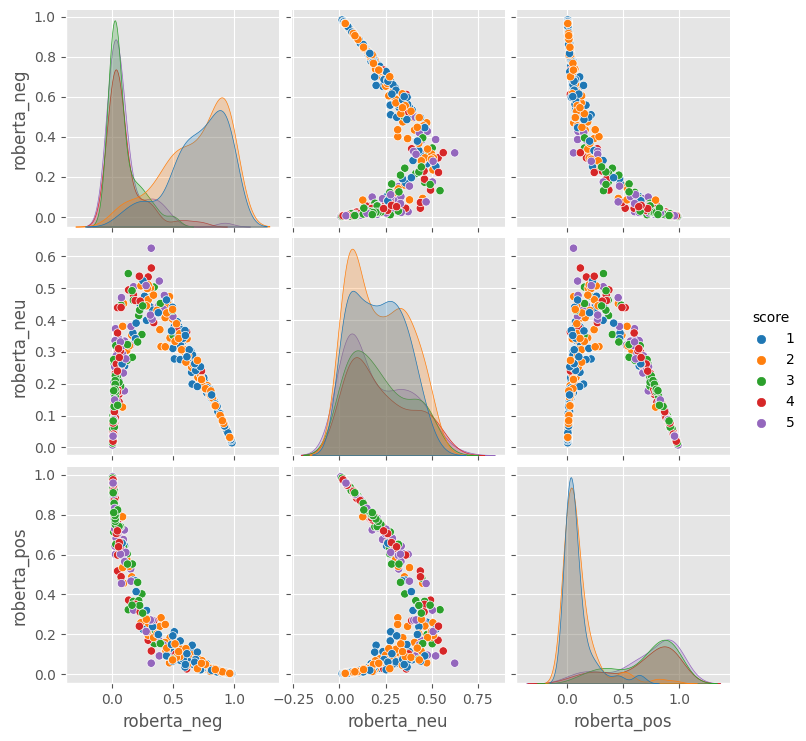

In [ ]:
sns.pairplot(data=results_df,
             vars=['roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='score',
            palette='tab10')
plt.show()

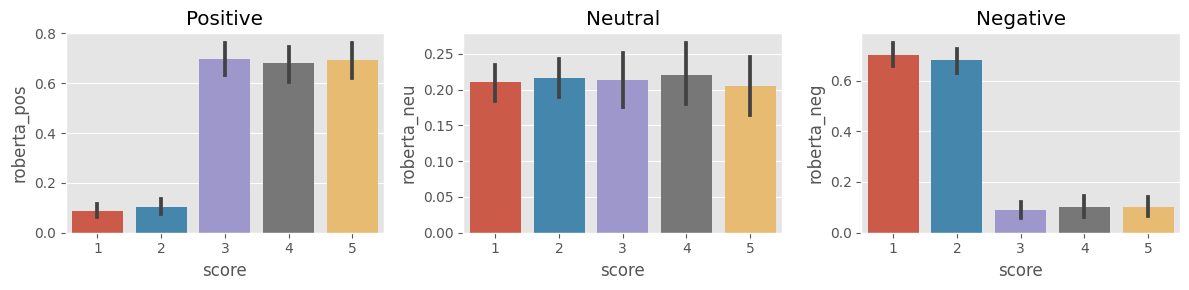

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=results_df, x='score', y='roberta_pos', ax=axs[0])
sns.barplot(data=results_df, x='score', y='roberta_neu', ax=axs[1])
sns.barplot(data=results_df, x='score', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### **Review Examples:**

Positive 1-Star and Negative 5-Star Reviews
Lets look at some examples where the model scoring and review score differ the most.

In [ ]:
results_df.query('score == 5') \
    .sort_values('roberta_neg', ascending=False)['review'].values[0]

'the endless bounds of our inhumanity to our own kind never fails to stun me  this truly astonishing story of a horrifically abused and largely unheard of population is compelling  well documented and enraging  as an american  i am constantly humiliated by my country s behaviour and this is just another in our long catalogue of international debasement  we suck  this is probably the first john pilger documentary i ve seen  but it immediately made me want to see what else he s done  my only complaint  and the reason i gave this film only   out of     is that pilger shows us this travesty and the appalling collaboration of the us and uk governments  demands that we viewers citizens are complicit in our own inaction   but makes no suggestion of how to help  i don t know about britain  but america s made it nearly impossible for the citizenry to take part in their government s doings  a gesture in the right direction might help these islanders  cause '

In [ ]:
results_df.query('score == 1') \
    .sort_values('roberta_pos', ascending=False)['review'].values[0]

'in all honesty  i haven t seen this film for many years  but the few times i have tend to make parts of it stick in my memory  as anyone who has seen it will understand  i first saw it as a child at a ymca halloween party in the early sixties  and it scared the hell out of us kids  in a fun way  i remember feeling genuine anxiety about the unknown thing lurking in the maze  i can t risk giving away the ending  except to say that it was surprising  to say the least  i remember vaguely the entire audience of young boys letting out a big scared holler  followed by laughter when the terrible secret was revealed  the ending has been seen by most viewers as one of the greatest unintentionally funny climaxes to a movie in film history  and yet oddly moving  in a way  you have to see it for yourself  which is not easy these days  i don t know if it s available on home video or not  but it would still make a great halloween feature for both kids and adults '